In [53]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# Problem Statement

# 1.Data Gathering

In [54]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
pip install summarytools

Note: you may need to restart the kernel to use updated packages.


# summary

In [56]:
import pandas as pd
from summarytools import dfSummary
titanic = pd.read_csv('titanic.csv')
dfSummary(titanic)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[int64],Mean (sd) : 0.4 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZz3zk8VLQhaZ1GEYCvx3L399ATDG7NqCWuuylDKfOP9zGIbjxL3w7ddQa63L9Xr92nXdasrww+HwXmt9Eyv3unZHnXddt9put8e+70+3DG6tLXa73Wq/389LKULlLlcf/aWU0vf9abPZfEyYv5ywB37wMkUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhFFfocIYzzysRKg8xLMPKxEqj/LUw0qEykM967ASL1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRRv2+p7W2uHVwa21xPp9npZSu1nrzhRGnu1wus6mtXFvzBf1jTn1geGNvAAAAAElFTkSuQmCC"">",0(0.0%)
3,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkklEQVR4nO3dUWoiQRiF0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWRucs5rW1I2H1IK+tdpmgr873589gZgjtVnb4Cvo9a6LaWsn1z+d5qml7cuCpVF1Fq3+/3+5zAMu2fWXy6X37XWX2/FKlSWsh6GYXc8Hl/GcXx9ZGFrbXM6nXbn83ldShEq/Y3j+Ho4HP48sXT73kUfpoggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3P1r9J6TLmCud0PtPekC5rr3jtp10gXMNWsqSq9JFzCX8T0dONcvT6gLc67vQ6jLc67vQKidONcvyxf+RBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9SvU1trm0SdurW2u1+uqlDLUWh/eWLDhdrutvuE9+9DrvveYf4LcdwKKR7CqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Boulos, Mr. Hanna3. Frolicher-Stehli, Mr. Maxmilli4. Gilinski, Mr. Eliezer5. Murdlin, Mr. Joseph6. Rintamaki, Mr. Matti7. Stephenson, Mrs. Walter Bertra8. Elsbury, Mr. William James9. Bourke, Miss. Mary10. Chapman, Mr. John Henry11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGb

# collapsible summary

In [57]:
import pandas as pd
from summarytools import dfSummary
titanic = pd.read_csv('titanic.csv')
dfSummary(titanic, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[int64],Mean (sd) : 0.4 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZz3zk8VLQhaZ1GEYCvx3L399ATDG7NqCWuuylDKfOP9zGIbjxL3w7ddQa63L9Xr92nXdasrww+HwXmt9Eyv3unZHnXddt9put8e+70+3DG6tLXa73Wq/389LKULlLlcf/aWU0vf9abPZfEyYv5ywB37wMkUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhFFfocIYzzysRKg8xLMPKxEqj/LUw0qEykM967ASL1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRRv2+p7W2uHVwa21xPp9npZSu1nrzhRGnu1wus6mtXFvzBf1jTn1geGNvAAAAAElFTkSuQmCC"">",0(0.0%)
3,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkklEQVR4nO3dUWoiQRiF0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWRucs5rW1I2H1IK+tdpmgr873589gZgjtVnb4Cvo9a6LaWsn1z+d5qml7cuCpVF1Fq3+/3+5zAMu2fWXy6X37XWX2/FKlSWsh6GYXc8Hl/GcXx9ZGFrbXM6nXbn83ldShEq/Y3j+Ho4HP48sXT73kUfpoggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3P1r9J6TLmCud0PtPekC5rr3jtp10gXMNWsqSq9JFzCX8T0dONcvT6gLc67vQ6jLc67vQKidONcvyxf+RBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9SvU1trm0SdurW2u1+uqlDLUWh/eWLDhdrutvuE9+9DrvveYf4LcdwKKR7CqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Boulos, Mr. Hanna3. Frolicher-Stehli, Mr. Maxmilli4. Gilinski, Mr. Eliezer5. Murdlin, Mr. Joseph6. Rintamaki, Mr. Matti7. Stephenson, Mrs. Walter Bertra8. Elsbury, Mr. William James9. Bourke, Miss. Mary10. Chapman, Mr. John Henry11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGb

# 2. Exploratory Data Analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## checking outliers in each column

PassengerId       Axes(0.125,0.11;0.0945122x0.77)
Survived       Axes(0.238415,0.11;0.0945122x0.77)
Pclass         Axes(0.351829,0.11;0.0945122x0.77)
Age            Axes(0.465244,0.11;0.0945122x0.77)
SibSp          Axes(0.578659,0.11;0.0945122x0.77)
Parch          Axes(0.692073,0.11;0.0945122x0.77)
Fare           Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

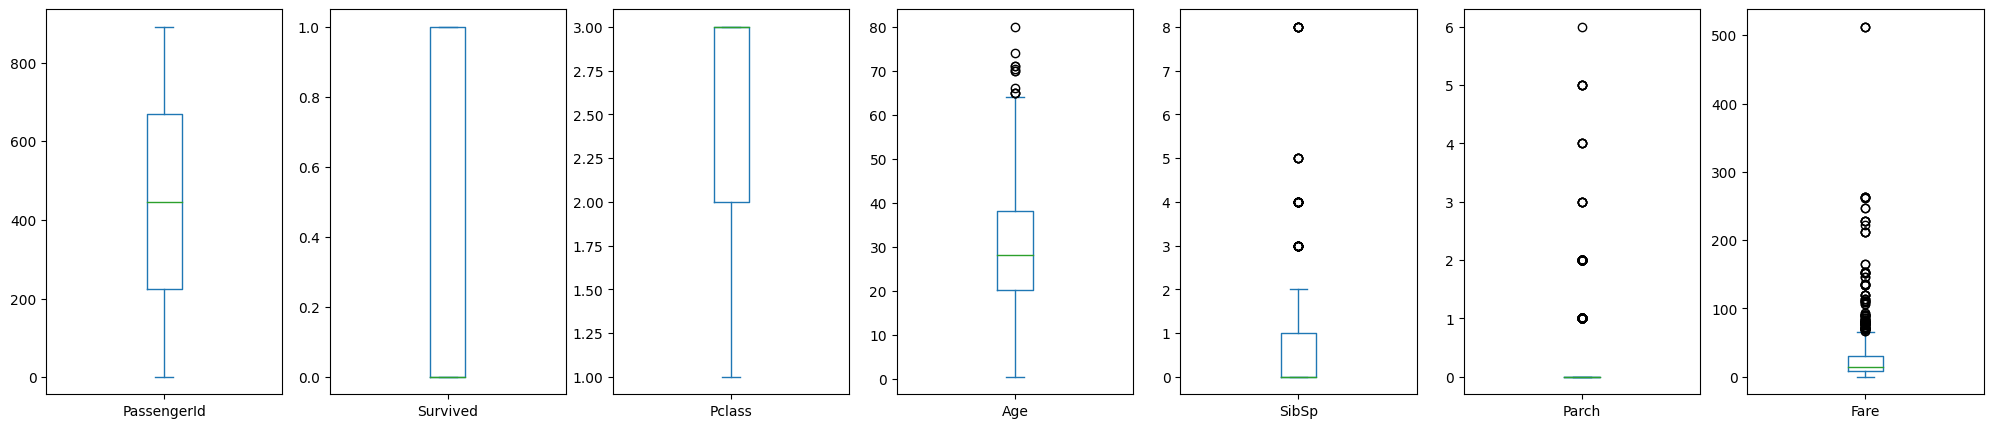

In [59]:
df.plot(kind='box', subplots= True, figsize= (25,5))

In [60]:
df_cat = df.select_dtypes(np.object)   #To check All object columns in datatype
df_num = df.select_dtypes(np.number)   #To check All numeric(int,float) columns in datatype

In [61]:
df_cat

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [62]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
df.isna().sum()           #to check missing value is present or not

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

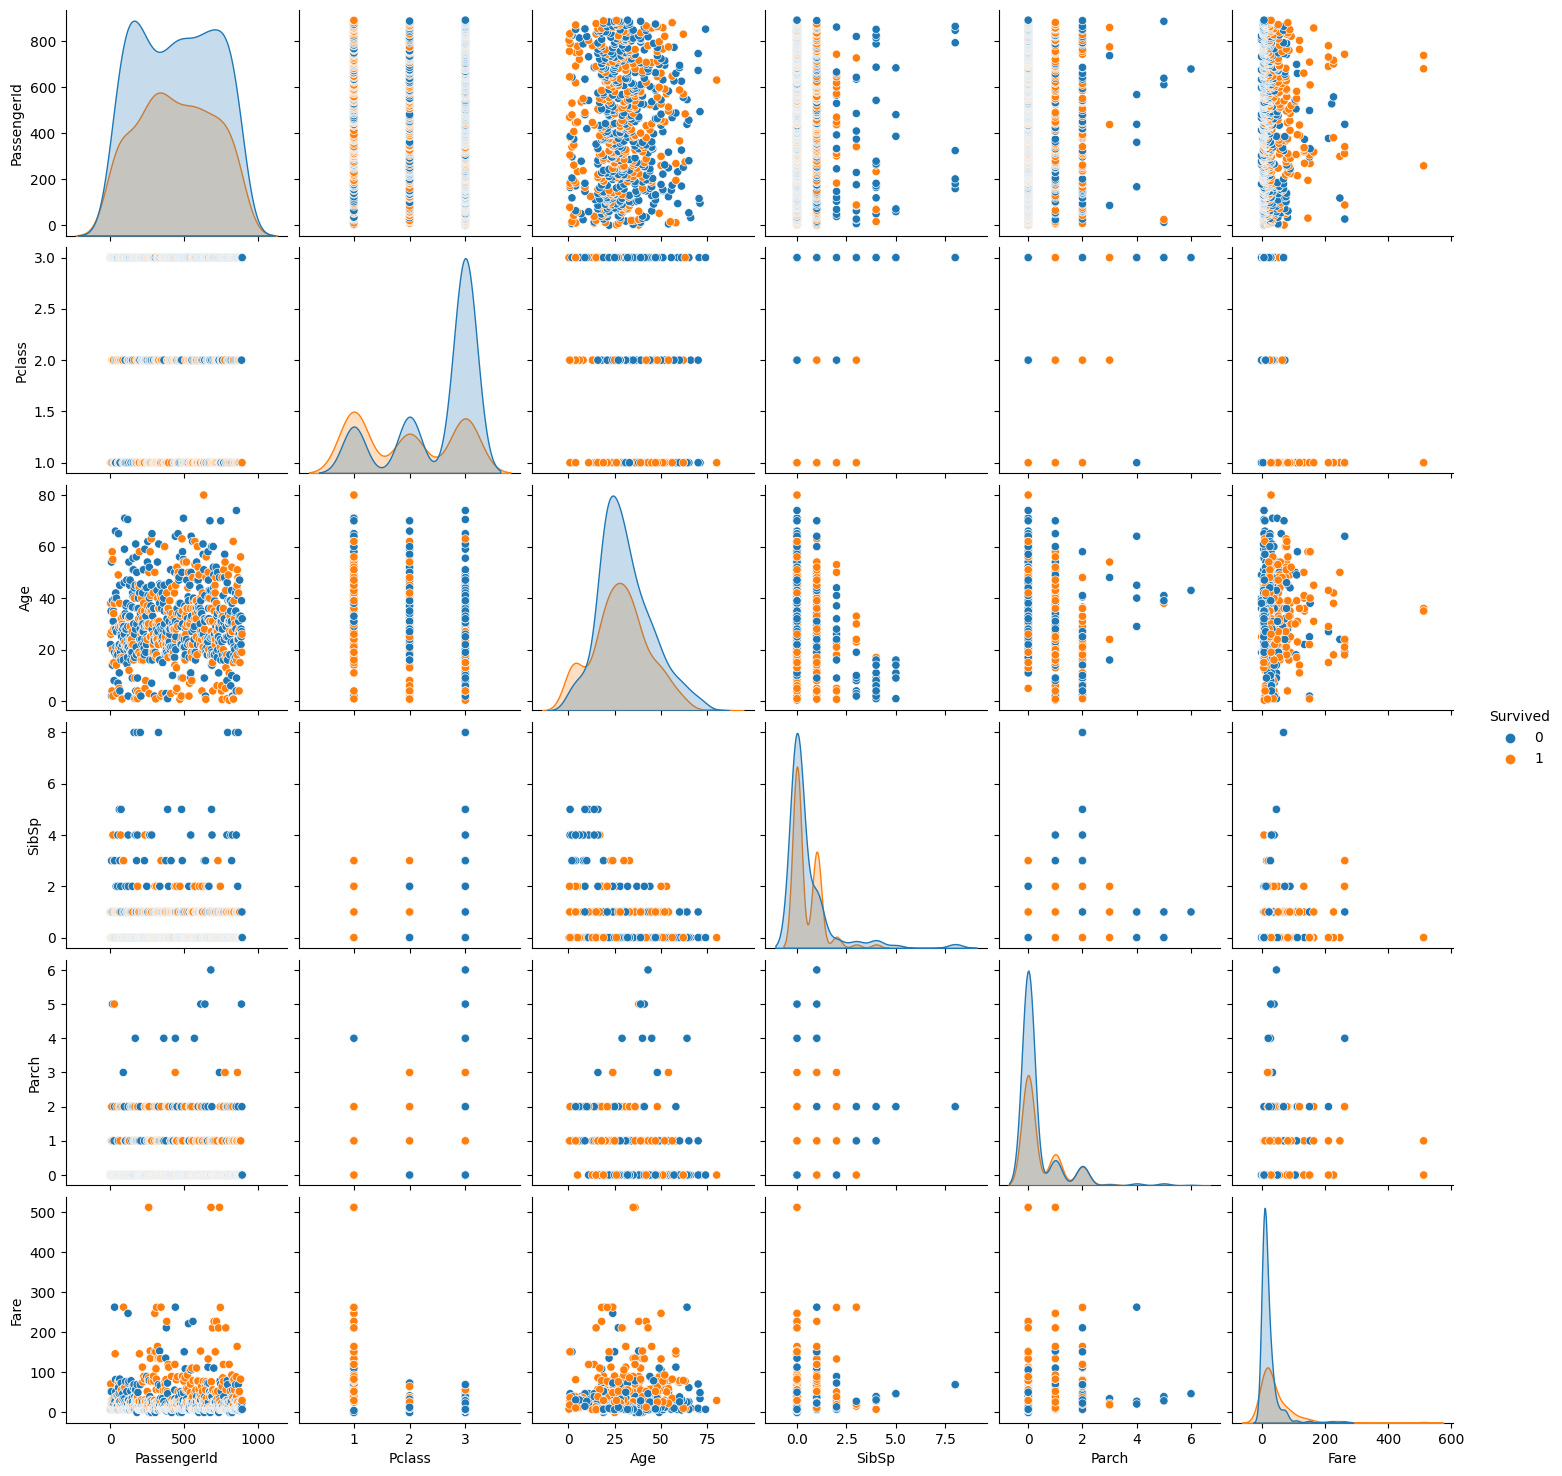

In [65]:
sns.pairplot(df,hue="Survived")

# 3.Feature Enginnering

## 3.1 PassengerId

In [66]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [67]:
df['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [68]:
df['PassengerId'].isna().sum()        #to check missing values present or not

0

<Axes: xlabel='PassengerId'>

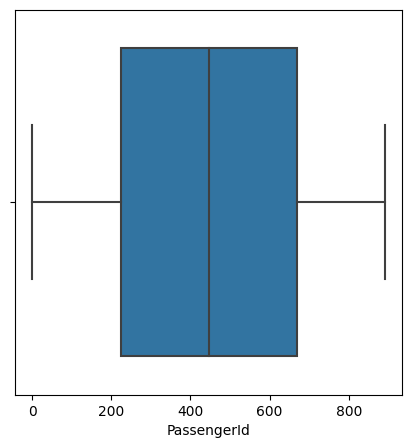

In [69]:
# To check the outlires are present or not

plt.figure(figsize=(5,5))
sns.boxplot(x = df['PassengerId']) 

## 3.2 Survived 

In [70]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
df['Survived'].isna().sum()        #to check missing values present or not

0

<Axes: xlabel='Survived'>

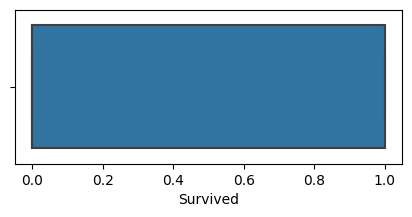

In [72]:
# To check the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Survived'])

## 3.3 Pclass  

In [73]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [74]:
df['Pclass'].isna().sum()        #to check missing values present or not

0

<Axes: xlabel='Pclass'>

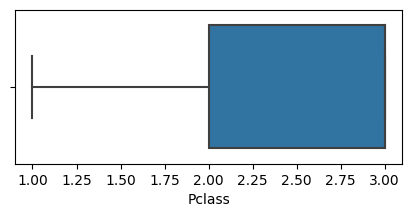

In [75]:
# To check the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Pclass'])

## 3.4 Name 

In [76]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [77]:
df['Name'].isna().sum()        #to check missing values present or not

0

## 3.5 Gender

In [78]:
df['Gender']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 891, dtype: object

In [79]:
df['Gender'].isna().sum()        #to check missing values present or not

0

In [127]:
df["Gender"].replace({'male': 0, 'female': 1},inplace=True)

In [146]:
Gender_dict = {'male': 0, 'female': 1}

# 3.6 SibSp 

In [80]:
df['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [81]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [82]:
df['SibSp'].isna().sum()        #to check missing values present or not

0

<Axes: xlabel='SibSp'>

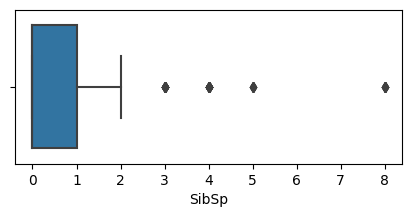

In [83]:
# To check the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['SibSp'])

In [84]:
# Ouliers finding by using IQR Method and Imputing outliers by values

q1=df["SibSp"].quantile(0.25)
q2=df['SibSp'].quantile(0.50)
q3=df['SibSp'].quantile(0.75)
median=df['SibSp'].median()
IQR=q3-q1
upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 1.0
Median : 0.0
upper_tail : 2.5
lower_tail : -1.5


In [85]:
df.loc[(df['SibSp'] > upper_tail),'SibSp']  = upper_tail

<Axes: xlabel='SibSp'>

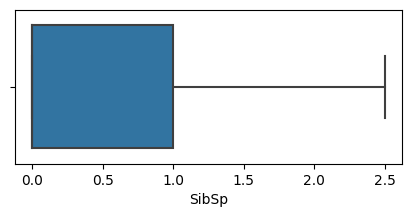

In [86]:
# To check again the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['SibSp'])

## 3.7 Parch 

In [87]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [88]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [89]:
df['Parch'].isna().sum()        #to check missing values present or not

0

<Axes: xlabel='Parch'>

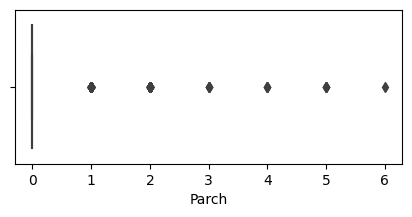

In [90]:
# To check the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Parch'])

In [91]:
# Ouliers finding by using IQR Method and Imputing outliers by values

q1=df["Parch"].quantile(0.25)
q2=df['Parch'].quantile(0.50)
q3=df['Parch'].quantile(0.75)
median=df['Parch'].median()
IQR=q3-q1
upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
Median : 0.0
upper_tail : 0.0
lower_tail : 0.0


In [92]:
df['Parch'].loc[df['Parch']>upper_tail]=upper_tail
df[['Parch']].loc[df['Parch']>upper_tail]

,Parch


<Axes: xlabel='Parch'>

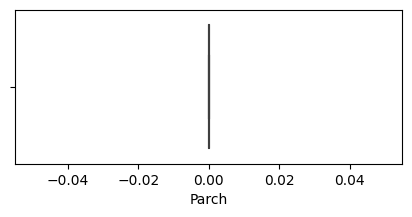

In [93]:
# To check again the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Parch'])

## 3.8 Ticket

In [94]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [95]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [96]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [97]:
df['Ticket'].isna().sum()        #to check missing values present or not

0

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


## 3.9 Fare

In [101]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [102]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

## 3.10 Cabin

In [103]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [104]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [105]:
df['Cabin'].isna().sum()        #to check missing values present or not

687

## 3.11 Embarked

In [106]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [107]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
df['Embarked'].isna().sum()

2

In [109]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [111]:
#one hot encoding

df = pd.get_dummies(df,columns=['Embarked'])

## 3.12 Age

In [112]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [113]:
df['Age'].isna().sum()

177

In [114]:
#filling NAN value with median

df['Age'].fillna(df['Age'].median(),inplace=True) 

In [115]:
df['Age'].isna().sum()

0

<Axes: xlabel='Age'>

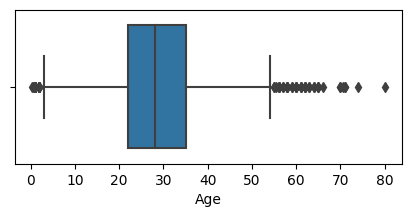

In [116]:
# To check the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Age'])

In [117]:
# Ouliers finding by using IQR Method and Imputing outliers by values

q1=df["Age"].quantile(0.25)
q2=df['Age'].quantile(0.50)
q3=df['Age'].quantile(0.75)
median=df['Age'].median()
IQR=q3-q1
upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 22.0
Q2 : 28.0
Q3 : 35.0
Median : 28.0
upper_tail : 54.5
lower_tail : 2.5


In [118]:
df.loc[(df['Age'] > upper_tail),'Age'] = upper_tail

In [119]:
df.loc[(df['Age'] < lower_tail),'Age'] = lower_tail 

<Axes: xlabel='Age'>

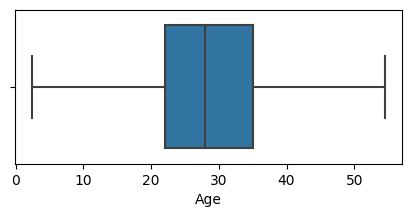

In [120]:
# To check again the outlires are present or not

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Age'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(4), object(4), uint8(3)
memory usage: 79.3+ KB


In [122]:
#drop less important columns form dataset

df.drop([ 'PassengerId','Ticket','Cabin','Name' ],axis=True,inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Gender      891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 51.5+ KB


# 4. Model Training

### Train_Test_Split

In [136]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.25, random_state= 21, stratify=y)

In [137]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

# 5. Model Evaluation

In [138]:
#Testing Dataset

y_pred_test = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("*"*60)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print("Multilabel Confusion Matrix\n",multi_cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing data : ",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n",clf_report)

************************************************************
Multilabel Confusion Matrix
 [[[ 61  25]
  [ 23 114]]

 [[114  23]
  [ 25  61]]]
************************************************************
Accuracy on testing data :  0.7847533632286996
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       137
           1       0.73      0.71      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [140]:
#Traning Dataset

y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*60)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel Confusion Matrix\n",multi_cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data: ",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[352  58]
 [ 75 183]]
************************************************************
Multilabel Confusion Matrix
 [[[183  75]
  [ 58 352]]

 [[352  58]
  [ 75 183]]]
************************************************************
Accuracy on training data:  0.8008982035928144
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       410
           1       0.76      0.71      0.73       258

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.79       668
weighted avg       0.80      0.80      0.80       668



# ACCURACY FOR TRANING AND TESTING

### Testing Accuracy : 0.7847533632286996 Traning Accuracy : 0.8008982035928144

# AUC ROC Curve

Text(0.5, 1.0, 'Receiver Operating Characteristics Curve')

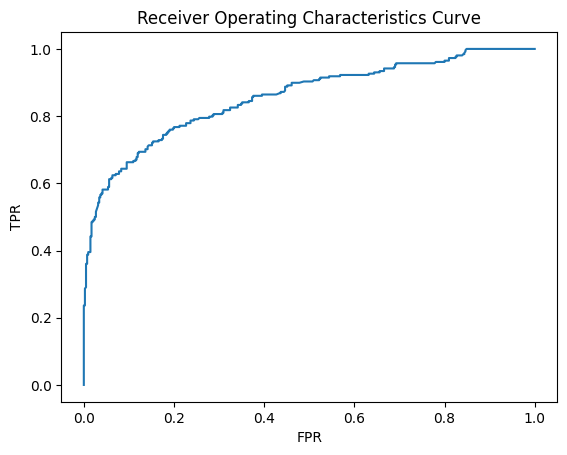

In [142]:
y_pred_prob = logistic_model.predict_proba(x_train)   
y_pred_prob[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristics Curve")

In [143]:
auc_value = auc(fpr, tpr)
auc_value

0.8569105691056909

In [144]:
threshold = [0.5, 0.6, 0.7, 0.8,0.9]

df = pd.DataFrame()

for i in  threshold:
    preds = (logistic_model.predict_proba(x_test)[:,1] > i).astype(int)

    df1 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df = pd.concat([df,df1], axis = 1)
    
df.columns = threshold
df

,0.5,0.6,0.7,0.8,0.9
Accuracy,0.784753,0.789238,0.753363,0.744395,0.681614
recall,0.709302,0.616279,0.453488,0.372093,0.197674
Precision,0.726190,0.791045,0.829787,0.914286,0.894737
F1-Score,0.717647,0.692810,0.586466,0.528926,0.323810


# Single User Input Testing

In [145]:
x.head(5).T

,0,1,2,3,4
Pclass,3.00,1.0000,3.000,1.0,3.00
Gender,0.00,1.0000,1.000,1.0,0.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00


In [147]:
Pclass = 1.0
Gender = 'male'
Age = 35.0
SibSp = 1.0	
Parch = 0.0
Fare = 53.1
Embarked  = 'Q'

In [148]:
column_names = x.columns 
column_names

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [149]:
# create picke file

with open("Titanic_Dataset_pkl.pkl", "wb") as f:
    pickle.dump(logistic_model, f)

In [150]:
save_data = {"Gender":Gender_dict,
             "columns":list(column_names)}

with open("Titanic_dataset_json.json", "w") as f:
    json.dump(save_data, f)

In [151]:
Embarked_col = 'Embarked_' + Embarked
Embarked_col 

'Embarked_Q'

In [153]:
Embarked_col_index = np.where(column_names == Embarked_col)[0][0]
Embarked_col_index

7

In [154]:
# creating an array of zeros of len(x.columns)=  6

array = np.zeros(len(x.columns))  

array[0] = Pclass
array[1] = save_data["Gender"][Gender]
array[2] = Age
array[3] = SibSp
array[4] = Parch
array[5] = Fare 

array[Embarked_col_index] = 1

array

array([ 1. ,  0. , 35. ,  1. ,  0. , 53.1,  0. ,  1. ,  0. ])

In [155]:
prediction = logistic_model.predict([array])[0]
prediction 

0

In [156]:
prediction= logistic_model.predict([array])[0]
    
if prediction == 1:
    print("person has been survived")
else:
    print("sorry...! person may you search has been not survived")

sorry...! person may you search has been not survived
